<a href="https://colab.research.google.com/github/matheusmottadf/mpv_I/blob/main/MVP_Matheus_Motta_Dias_Ferreira_Sprint_I_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP Matheus Motta Dias Ferreira - Sprint I:  Análise de Dados e Boas Práticas



 ## **Objetivo e Premissas**

Selecionei um conjunto de dados de uma campanha de marketing executada através de ligações telefônicas feitas por representantes um banco português. O objetivo de campanha é atrair cliente para realização de investimentos na modalidade de prazo fixo (term deposit).

O objetivo desse trabalho é analisar o conjunto de dados disponibilizado através de gráficos, extraindo possíveis insights, padrões e correlações entre atributos.

Esse é um problema de aprendizado supervisionado e o conjunto de dados é composto por uma série de dados categóricos e numéricos dos clientes que vão desde idade, sexo e status civil até informações como tipo de emprego e duração da chamada.



  ## **Composição do Dataset**
   # Dados Bancários do cliente:
   1 - age (numeric)

   2 - job : tipo de emprego (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

   3 - marital : Status civil (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

   4 - Education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

   5 - balance : saldo em conta (numeric)

   6 - default: possui pendências de crédito? (categorical: 'no','yes','unknown')

   7 - housing: tem imóvel financiado? (categorical: 'no','yes','unknown')

   8 - loan: tem imprestimo pessoal? (categorical: 'no','yes','unknown')

   # Relativo ao último contato dessa camapanha:

   9 - contact: Canal de comunicação (categorical: 'cellular','telephone')

   10 - month: mês de último contato (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

  11 - day_of_week: último dia da semana do contato (categorical: 'mon','tue','wed','thu','fri')

  12 - duration: duração do último contato, em segundos (numeric). É importante salientar que esse atributo tem alto impacto no target, se a duração da chamada for igual a 0, por razões obvías,  o valor predito de y será 0. Tendo isso em mente, esse atributo será mantido apenas para fins acadêmicos, mas deve ser levado em conta que para cenários do "mundo real" esse atributo deve ser descartado do dataset.

   # Outros atributos:

  13 - campaign: número de contatos feitos com esse cliente durante o período da campanha  (numeric, includes last contact)

  14 - pdays: número de dias depois que o cliente foi contatado desde a última campanha  (numeric; 999 means client was not previously contacted)

  15 - previous: número de contatos feitos para esse cliente ANTES dessa campanha (numeric)

  16 - poutcome: resultado da última campanha feita com esse cliente (categorical: 'failure','nonexistent','success')

   
  # Target (y)

  17 target - 0 = não fez o investimento, 1 = fez o investimento (numeric)  


## Importanto as bibliotecas

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários -
# Considerando que o conjunto de dados a ser trabalho contém dados categóricos nominais, além das bibliotecas "pandas", "numpy", "sklearn"
!pip install category_encoders

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


## Importando dataset, análise e tratamento de dados com LabelEncoder


In [ ]:
# Importando o dataset do meu diretório GitHub usando ";" como delimitador do CSV
url = "https://raw.githubusercontent.com/matheusmottadf/mvp_II/main/bank_full.csv"
dataset = pd.read_csv(url, delimiter=";")





In [ ]:
# Renomeando nome da coluna 'y' para 'target'
dataset.rename(columns={'y': 'target'}, inplace=True)

In [ ]:
# Visualizando cabeçalho do dataset para verificar se foi importado corretamente
dataset.head()




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# Visualizando formato do dataset para parametrização
dataset.shape

(45211, 17)

In [ ]:
# Analisando tipo de dados
# A partir dessa analise podemos inferir que temos 8 atributos com dados numéricos e atributos 9 com dados nominais
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [ ]:
# Selecionando dados com classe de "objeto"
dataset.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [ ]:
# Selecionando dados com classe de "integral"
dataset.select_dtypes(include='int64')

,age,balance,day,duration,campaign,pdays,previous,target
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1
45207,71,1729,17,456,2,-1,0,1
45208,72,5715,17,1127,5,184,3,1
45209,57,668,17,508,4,-1,0,0


In [ ]:
# Selecionando dados com classe de "objeto" e vendo suas suas ocorrências e como estão distribuidos
dataset.select_dtypes(include='object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


In [ ]:
# Selecionando dados com classe de "objeto" e vendo suas suas ocorrências e como estão distribuidos
#
dataset.select_dtypes(include='int64').describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


A linha de código anterior é muito útil para ter uma ideia de como é a distribuição dos dados, com ela temos de média, valor mínimo, máximo e distribuição por quartis dos atributos. Entretanto, essa é uma vizualização em tabela, que apesar de útil, poderia ser muito melhor aproveitada em forma de gráficos.

Além disso, meu dataset contém uma série de atributos do tipo 'object' e por conta disso tenho que realizar um pré processamento de dados utilizando LabelEncoder. Muitos algoritmos de machine learning e bibliotecas de visualização em Python requerem que essas variáveis sejam convertidas em uma forma numérica antes de serem processadas.




In [ ]:
# Declarando variável com objetos categóricos nominais e numéricos

dataset_cats = dataset.select_dtypes(include='object')
dataset_int = dataset.select_dtypes(include='int64')

In [ ]:
# Mostrando dataset com nominais
dataset_cats

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [ ]:
# Mostrando dataset com numéricos
dataset_int

,age,balance,day,duration,campaign,pdays,previous,target
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1
45207,71,1729,17,456,2,-1,0,1
45208,72,5715,17,1127,5,184,3,1
45209,57,668,17,508,4,-1,0,0


## Também é possível observar que apesar de apresentar atributos com valores "0", esses são valores "reais" e o dataset não possui valores em branco ou nulos, o que facilita o trabalho de pré-processamento dos dados.

In [ ]:
# Definindo variavel LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Aplicando LabelEncoder no dataframe contendo atributos do tipo 'object'
dataset_encoded = dataset_cats.apply(lambda x: label_encoder.fit_transform(x))


In [ ]:
# Visualizando "mapeamento" dos dados encodados

for column in dataset_cats.columns:
    print(f"Mapeamento para {column}:")
    for original_value, encoded_value in zip(dataset_cats[column].unique(), dataset_encoded[column].unique()):
        print(f"{original_value} -> {encoded_value}")
    print()

Mapeamento para job:
management -> 4
technician -> 9
entrepreneur -> 2
blue-collar -> 1
unknown -> 11
retired -> 5
admin. -> 0
services -> 7
self-employed -> 6
unemployed -> 10
housemaid -> 3
student -> 8

Mapeamento para marital:
married -> 1
single -> 2
divorced -> 0

Mapeamento para education:
tertiary -> 2
secondary -> 1
unknown -> 3
primary -> 0

Mapeamento para default:
no -> 0
yes -> 1

Mapeamento para housing:
yes -> 1
no -> 0

Mapeamento para loan:
no -> 0
yes -> 1

Mapeamento para contact:
unknown -> 2
cellular -> 0
telephone -> 1

Mapeamento para month:
may -> 8
jun -> 6
jul -> 5
aug -> 1
oct -> 10
nov -> 9
dec -> 2
jan -> 4
feb -> 3
mar -> 7
apr -> 0
sep -> 11

Mapeamento para poutcome:
unknown -> 3
failure -> 0
other -> 1
success -> 2



In [ ]:
# Visualizando Dataframe tratado

dataset_encoded

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3
45207,5,0,0,0,0,0,0,9,3
45208,5,1,1,0,0,0,0,9,2
45209,1,1,1,0,0,0,1,9,3


In [ ]:
# Visualizando atributos dos dataset e confirmando que todas as colunas foram "encodadas" e não são mais do tipo 'object'
dataset_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   job        45211 non-null  int64
 1   marital    45211 non-null  int64
 2   education  45211 non-null  int64
 3   default    45211 non-null  int64
 4   housing    45211 non-null  int64
 5   loan       45211 non-null  int64
 6   contact    45211 non-null  int64
 7   month      45211 non-null  int64
 8   poutcome   45211 non-null  int64
dtypes: int64(9)
memory usage: 3.1 MB


In [ ]:
# Concatenando os dois dataframes
dataset_LE = pd.concat([dataset_encoded, dataset_int], axis=1)


In [ ]:
# Visualizando dataframe final
dataset_LE

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous,target
0,4,1,2,0,1,0,2,8,3,58,2143,5,261,1,-1,0,0
1,9,2,1,0,1,0,2,8,3,44,29,5,151,1,-1,0,0
2,2,1,1,0,1,1,2,8,3,33,2,5,76,1,-1,0,0
3,1,1,3,0,1,0,2,8,3,47,1506,5,92,1,-1,0,0
4,11,2,3,0,0,0,2,8,3,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,51,825,17,977,3,-1,0,1
45207,5,0,0,0,0,0,0,9,3,71,1729,17,456,2,-1,0,1
45208,5,1,1,0,0,0,0,9,2,72,5715,17,1127,5,184,3,1
45209,1,1,1,0,0,0,1,9,3,57,668,17,508,4,-1,0,0


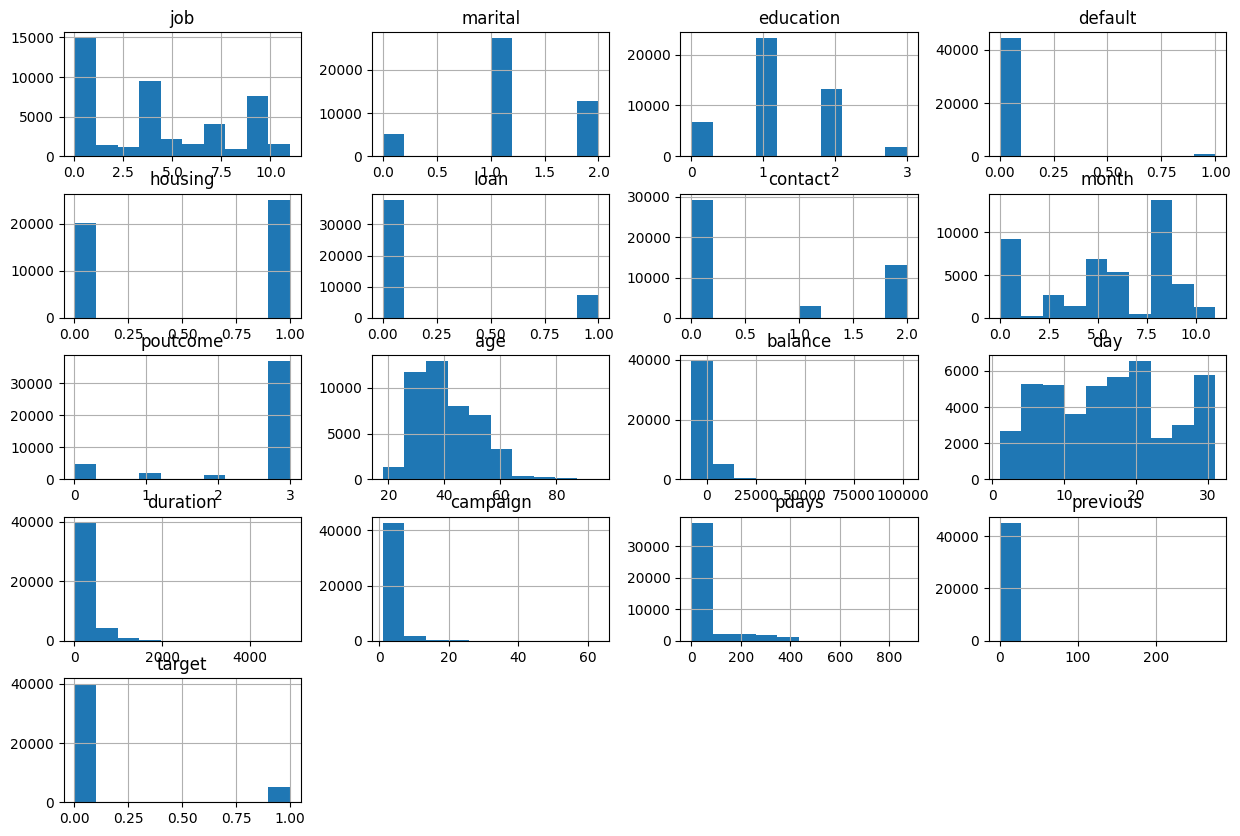

In [ ]:
# Plotando histograma e verificando a distribuição de atributos
dataset_LE.hist(figsize = (15,10))
plt.show()


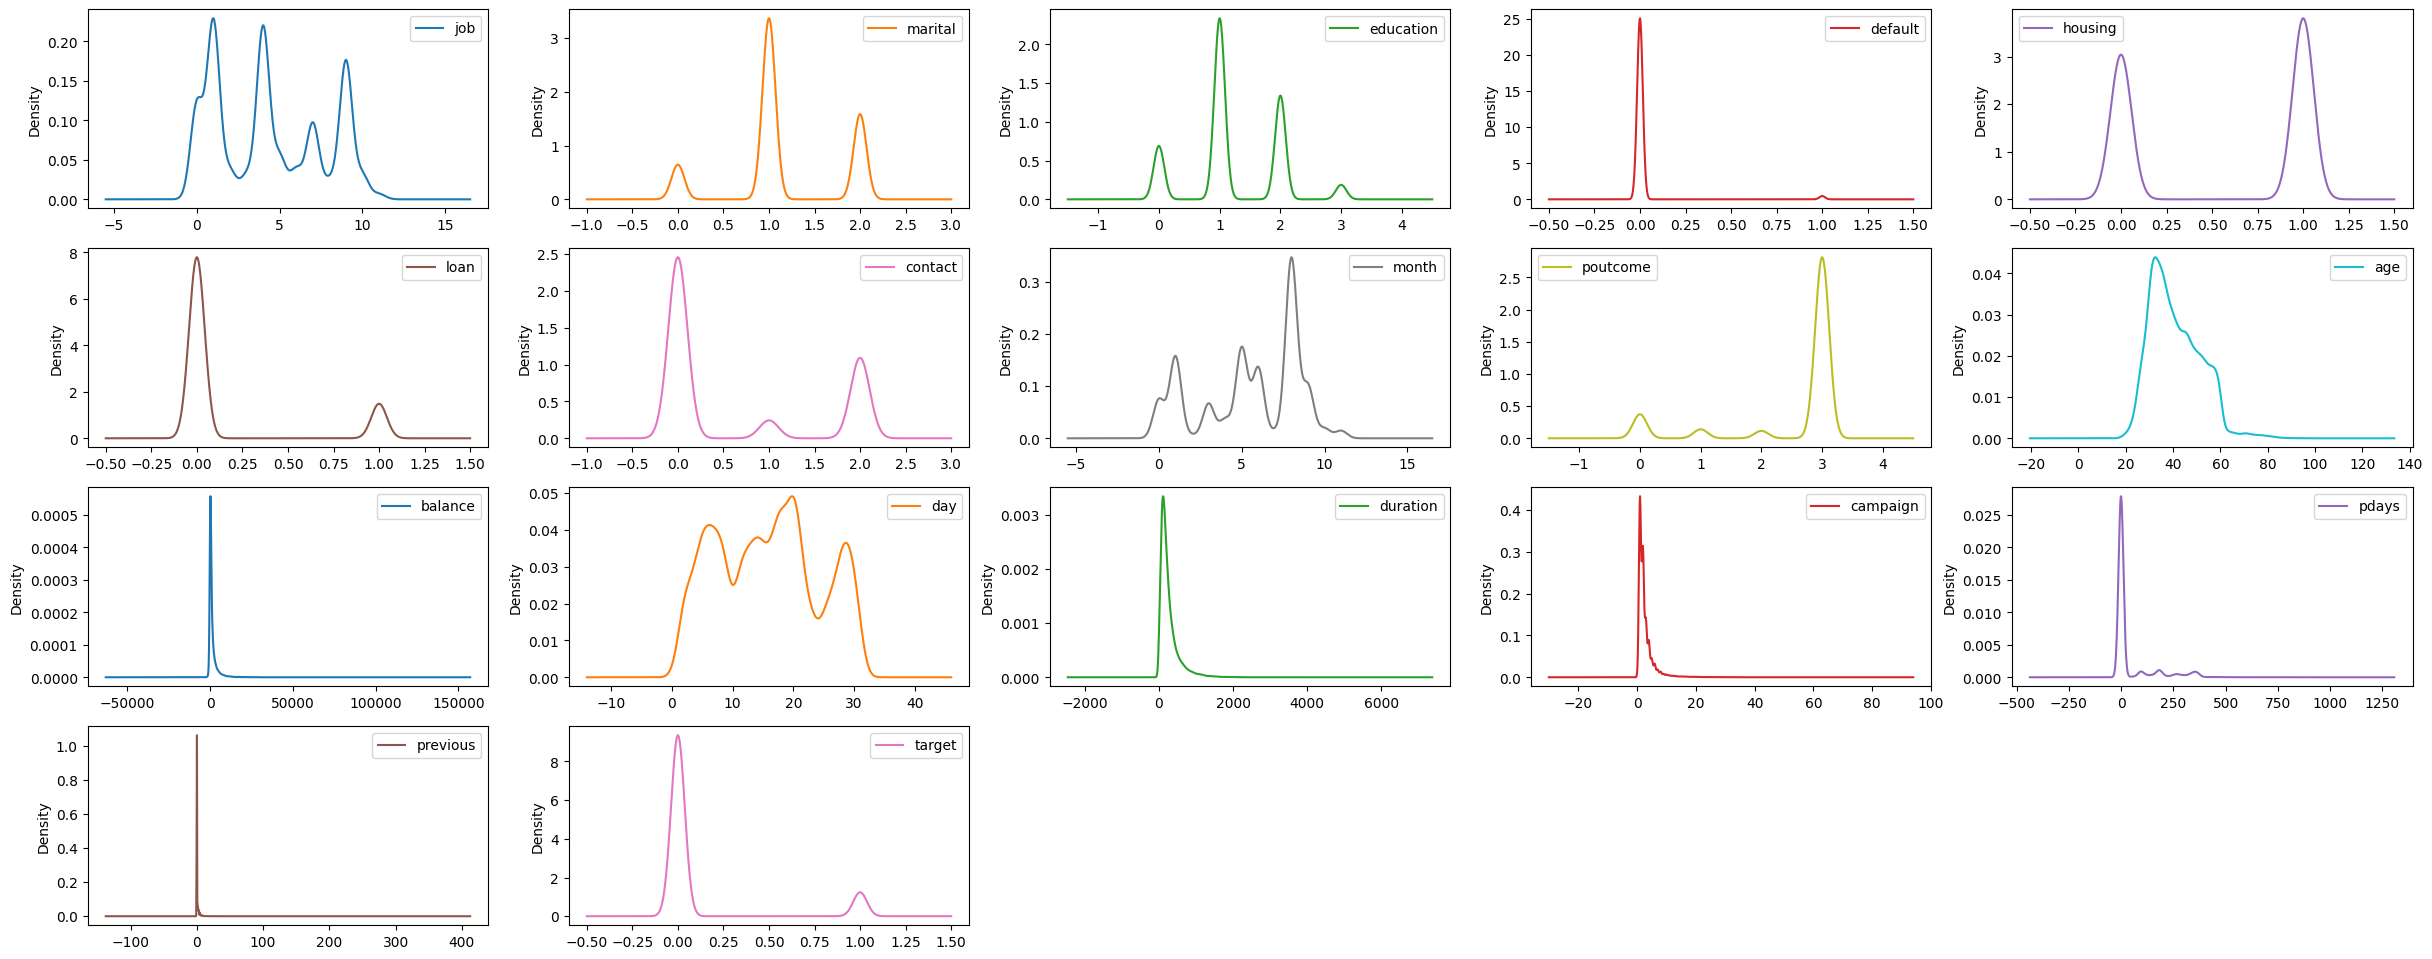

In [ ]:
# Mais uma maneira de visualizar a distribuição de atributos, dessa vez utilizando o Density Plot
dataset_LE.plot(kind='density', subplots=True, layout=(5, 5), sharex=False, figsize=(30, 15))
plt.show()

Por ter tratados os meus dados com LabelEncoder, representações visuais com boxplot ou scatter plot não fazem muito sentido. Essas são ótimas ferramentas para visualizar a distribuição/variação de dados numéricos. Ao aplicar LabelEncoder à minhas variaveis categóricas, os números atribuidos não serão interpretados corretamente pelo boxplot, pois esses valores não refletem relações numéricas significativas ou contínuas entre os atributos. O LabelEncoder apenas "traduz" os atributos para números.

O exemplo a seguir, utilizando Scatter Plot,  ilustra que os dados tratados com LabelEncoder não refletem necessariamente uma representação coerente das relações entre essas categorias, já que o "espaço" entre os valores numéricos "traduzidos" podem não refletir diferenças reais entre as categorias. Embora o gráfico tenha sido gerado, ele não fornece insights ou vizualizações de maneira confiável.


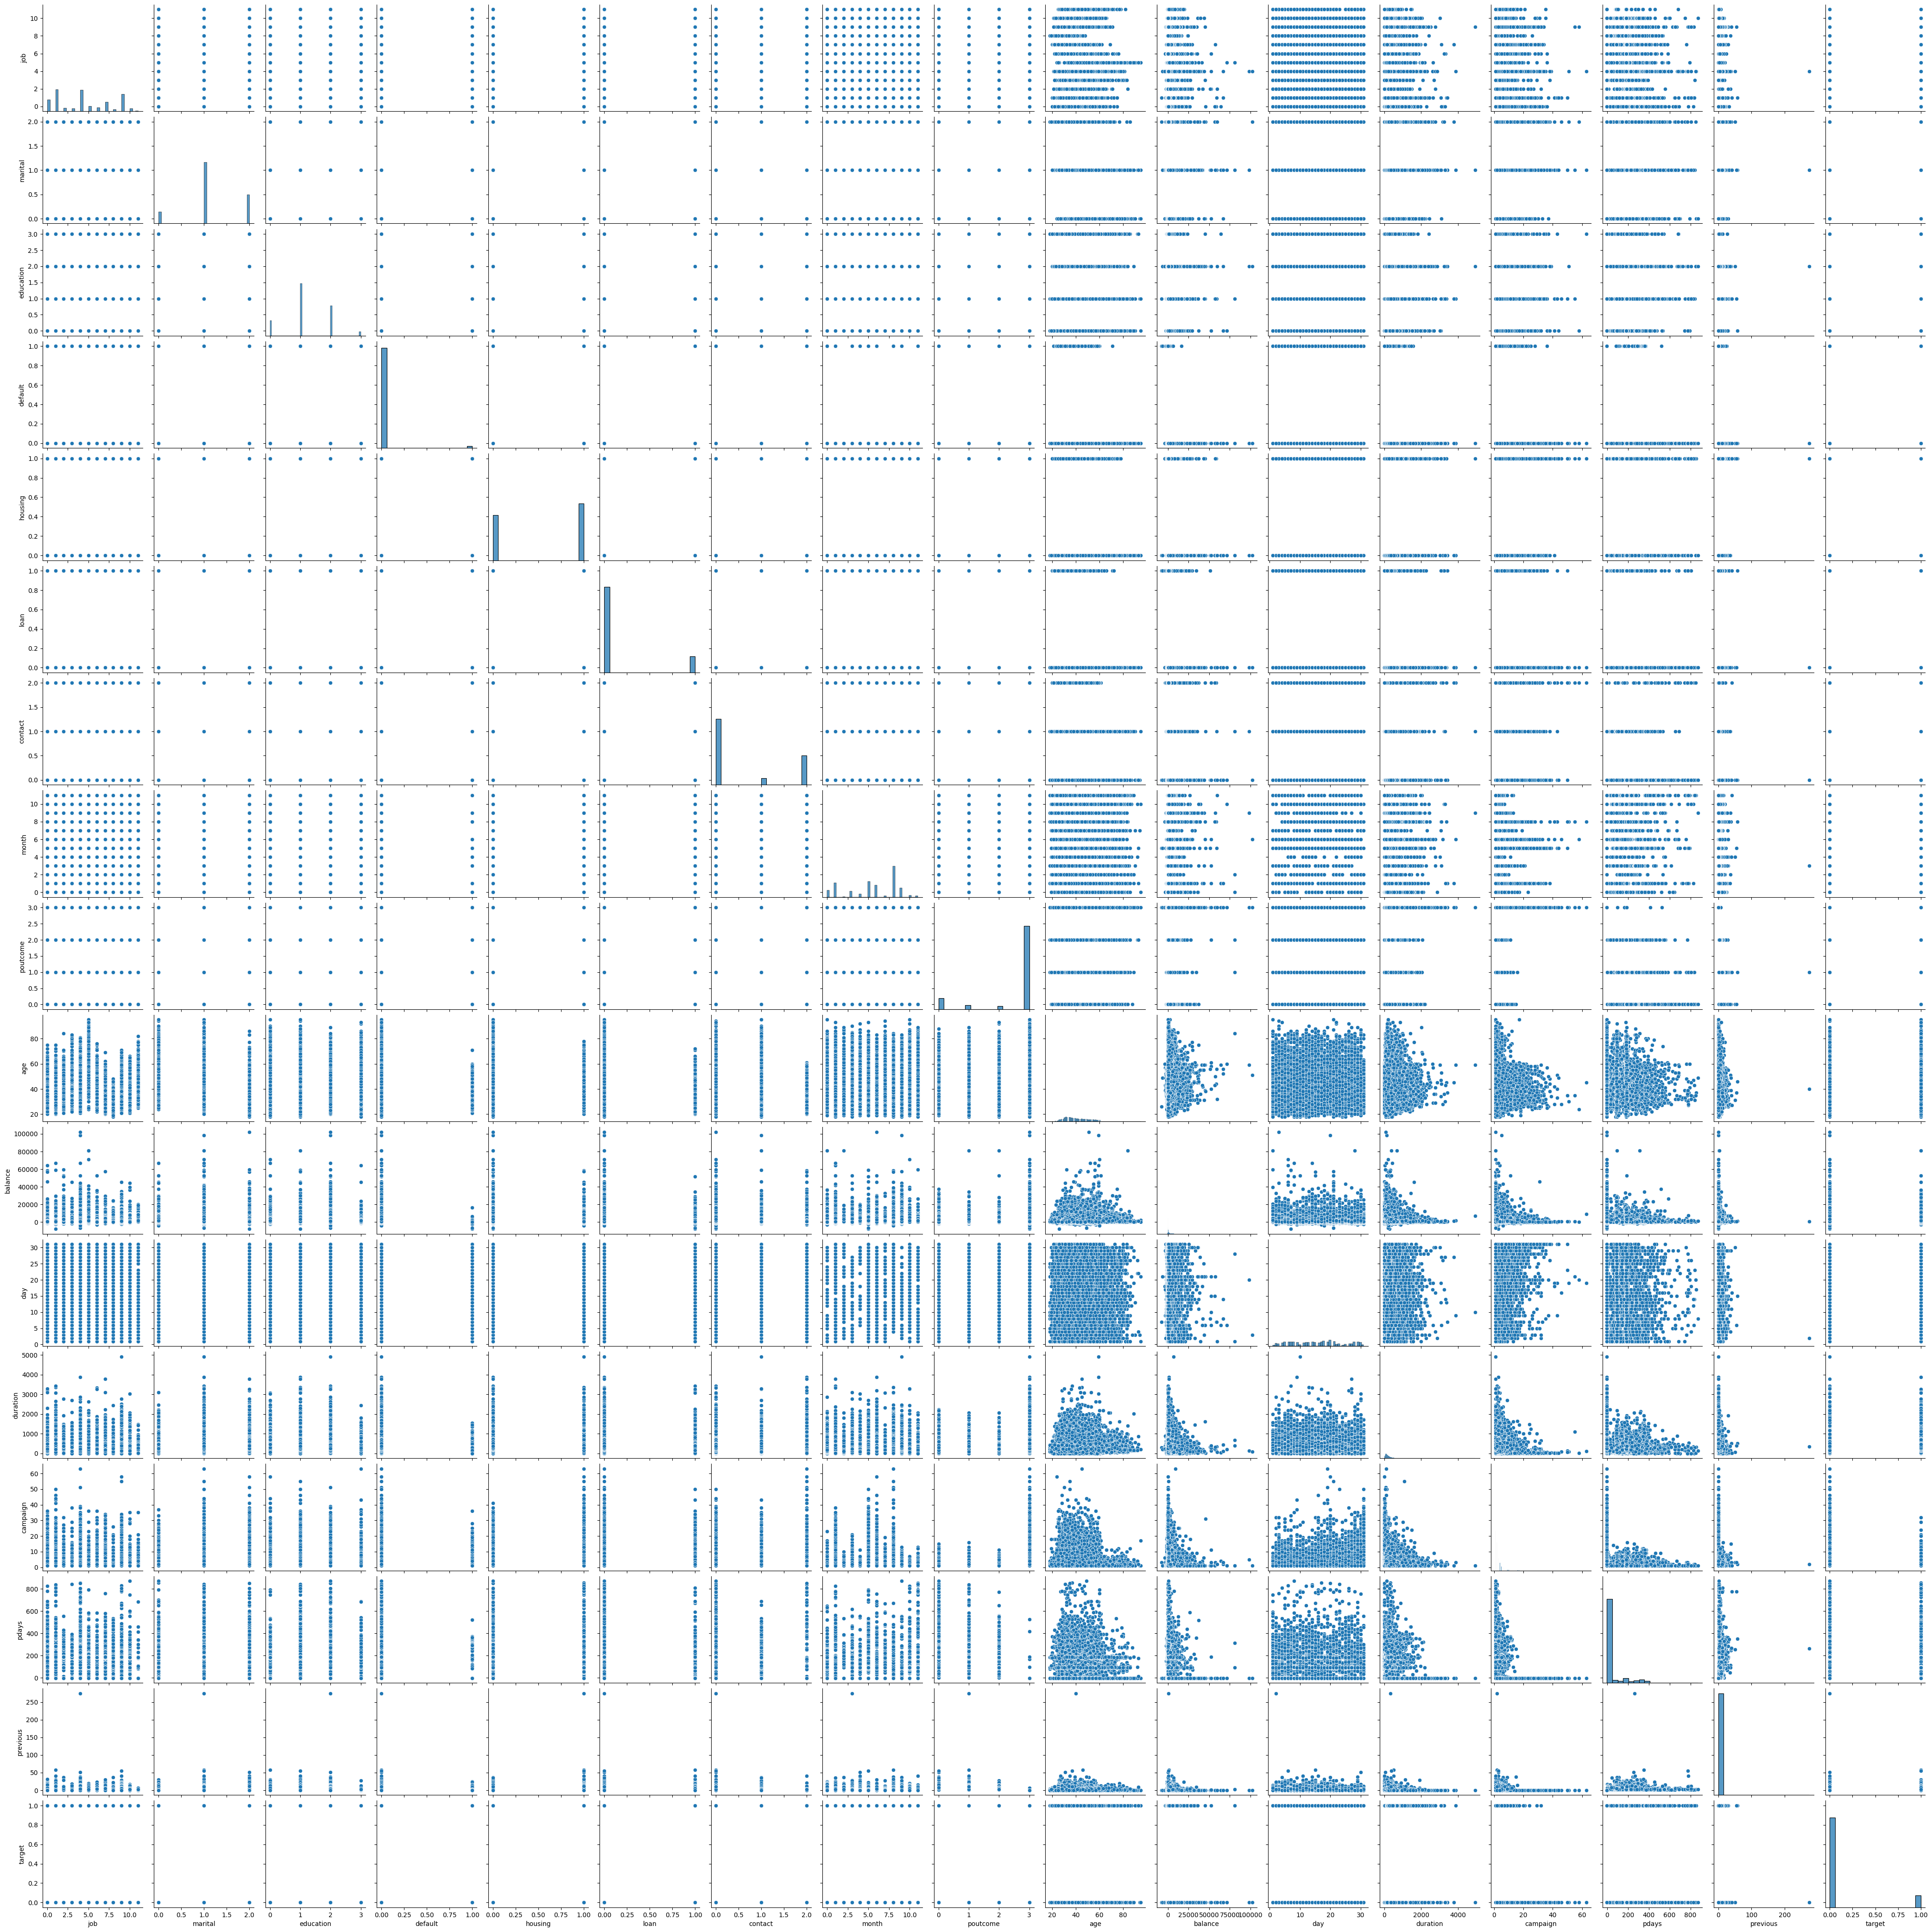

In [ ]:
# Visualizando o relacionamento entre variaveis utilizando o scatter plot

sns.pairplot(dataset_LE)

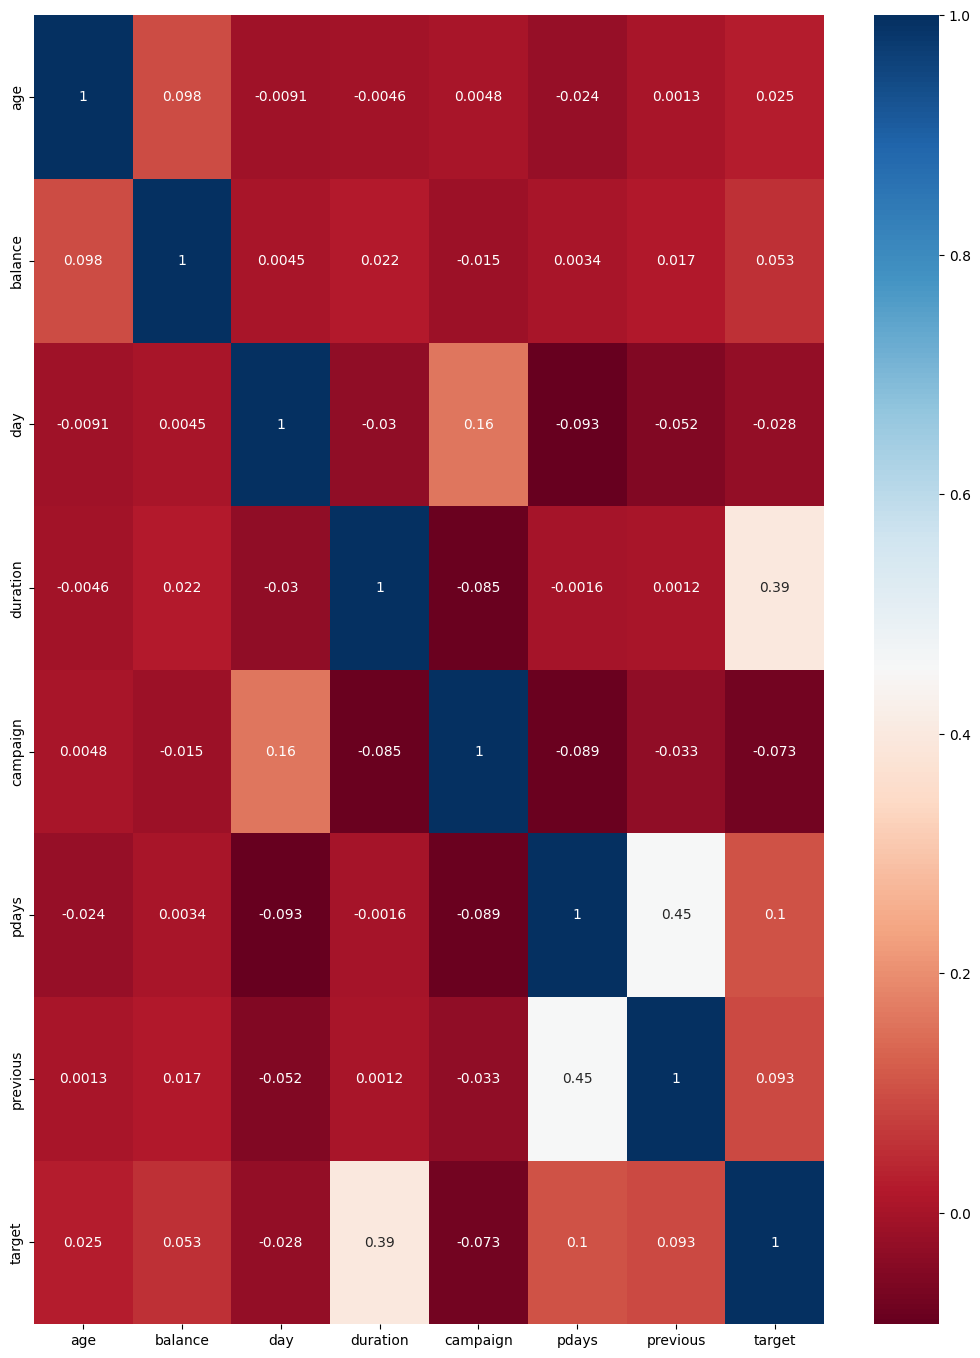

In [ ]:
# Definindo parametros e plotando matriz de correlação
largura_grafico = 0.75 * len(dataset.columns)
plt.figure(figsize=(largura_grafico, 17))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu')
plt.show()

A matriz de correlação mostra como cada variável se relaciona com as outras, indicando o grau e a direção dessa relação. Os valores da matriz variam entre -1 e 1. Quanto mais próximos de 1 ou -1, mais forte é a relação (positiva ou negativa, respectivamente). Enquanto valores próximos a 0 indicam uma correlação fraca ou inexistente. Essa matriz é uma ótima maneira de realizar análise estatística, ajudando a identificar associações entre diferentes elementos e a compreender a estrutura dos dados.

## Analise dos gráficos e conclusão


Analizando histogramas junto com o "mapeamento" dos atributos, notamos que a distribuição de clientes está entre 18 e 90 anos, sendo 40 anos a idade média. A profissão mais comum dos cliente é blue-collar (trabalhadores de industria ou comércio especializado). A maior parte dos clientes é casada. O grau de educação mais comum é secondary (pessoais com formação até o ensino secundário). A maior parte possui financiamento imobiliário, não possui outros emprestímos e a maior parte dos clientes não aceitaram realizar o investimento.

Analizando a matriz de correlação, notamos que os atributos de "balance" e "target" estão positivamente correlacionados, quando maior o saldo, maior a chance do cliente aceitar o investimento. Os atributos "age" e "balance" também estão positivamente correlacionados, quanto maior a idade, mais alto o saldo.

Ao trabalhar com um dataset contendo dados numéricos e categóricos, é importante ter em mente o tipo de tratamento a ser utilizado. Dados categóricos convertidos em numéricos utilizando LabelEncoder são bem visualizados quando apresentados em gráficos como barras e piecharts. Caso utilize gráficos como scatter plot ou gráficos de linha, podemos acabar tendo visualizações defasadas, pois esses números convertidos não apresentam relações de ordem ou magnitude.

É importante notar que caso o objetivo desse trabalho fosse treinar modelos de machine learning deveriamos utilizar One-Hot Encoding no lugar de LabelEncoder. Enquanto o LabelEncoder atribui números sequenciais às categorias, o One-Hot Encoding cria representações binárias distintas para cada categoria, evitando assim o maior problema quando se utiliza LabelEncoder, que é a "suposição" de qualquer relação de ordem entre as categorias. Por conta disso, não vou realizar holdout do dataset criado.